1、实现Adaboost方法对2个数据集进行分类分析，进行分类训练和测试，并给出分析结果；

2、采用已掌握算法（决策树、朴素贝叶斯、KNN或SVM）对数据集进行分析，并和Adaboost算法给出实验结果比较；

3、说明sklearn中Adaboost的算法原理（选做，读源码，写代码注释和算法流程）

实验要求：实验报告中要包含存储结构说明，算法思路设计，运行时的输入输出截图，算法源码中添加详细注释，写明算法流程等

注意：作业提交需包含所有代码，必要时可提交压缩包，代码尽可能在(姓名_集成学习.ipynb)中

In [330]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score


In [331]:
import numpy as np

class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.estimators = []
        self.alphas = []

    def fit(self, X, y):
        # 初始化样本权重
        w = np.ones(len(X)) / len(X)

        for i in range(self.n_estimators):
            # 训练弱分类器
            estimator = DecisionTreeClassifier(max_depth=1)
            estimator.fit(X, y, sample_weight=w)

            # 预测所有样本的类别并计算加权错误率
            y_pred = estimator.predict(X)
            err = np.sum(w[y != y_pred])

            # 计算弱分类器的权重alpha
            alpha = 0.5 * np.log((1 - err) / err)

            # 更新样本权重
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

            # 保存弱分类器和其对应的权重
            self.estimators.append(estimator)
            self.alphas.append(alpha)

    def predict(self, X):
        # 对每个弱分类器的预测结果进行加权求和
        y_pred = np.zeros(len(X))
        for i in range(self.n_estimators):
            y_pred += self.alphas[i] * self.estimators[i].predict(X)

        # 将加权和转换为二元分类的类别
        return np.sign(y_pred).astype(int)


基分类器采取决策树
在fit方法中，我们首先初始化权重向量w，将每个样本的权重设置为1，对于每次迭代，我们使用DecisionTreeClassifier作为弱分类器，并使用当前权重向量来拟合模型。然后，我们用训练数据预测标签，并计算当前弱分类器的错误率。接下来，我们计算弱分类器的权重alpha，并更新权重向量w。最后，我们保存弱分类器和相应的权重alpha。

在predict方法中，我们首先初始化预测标签向量y_pred为全零向量，并对于每个弱分类器，使用其预测函数对输入数据进行预测，并根据其权重alpha对弱分类器的预测结果进行加权。最后，我们返回一个二元标签向量，其中正数表示正类，负数表示负类。

# wine数据集

In [332]:
wine=pd.read_csv('./dataset/winequality-red.csv',";")
data_wine=wine.iloc[:,:-1]
data_wine

C:\Users\X2931\AppData\Local\Temp\ipykernel_33680\1776900977.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  wine=pd.read_csv('./dataset/winequality-red.csv',";")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [333]:
target_wine=wine.iloc[:,-1]
target_wine= np.where(target_wine>=6, int(1), int(0))
target_wine

array([0, 0, 0, ..., 1, 0, 1])

In [334]:
X_train,X_test,y_train,y_test=train_test_split(data_wine.values,target_wine,test_size=0.75,random_state=42)

In [335]:
# 在wine数据集上测试Adaboost
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# 计算准确率
accuracy_wine = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_wine)
# 计算精确率
precision_wine = precision_score(y_test, y_pred)
print("Precision:", precision_wine)
# 计算召回率
recall_wine = recall_score(y_test, y_pred)
print("Recall:", recall_wine)
# 计算F1值
f1_wine = f1_score(y_test, y_pred)
print("F1 Score:", f1_wine)


Accuracy: 0.6541666666666667
Precision: 0.6181619256017505
Recall: 0.8954041204437401
F1 Score: 0.7313915857605179


# wine的KNN,朴素贝叶斯

In [339]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# 计算准确率
accuracy_wine1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_wine1)
# 计算精确率
precision_wine1 = precision_score(y_test, y_pred,average='micro')
print("Precision:", precision_wine1)
# 计算召回率
recall_wine1 = recall_score(y_test, y_pred,average='micro')
print("Recall:", recall_wine1)
# 计算F1值
f1_wine1 = f1_score(y_test, y_pred,average='micro')
print("F1 Score:", f1_wine1)



Accuracy: 0.61
Precision: 0.61
Recall: 0.61
F1 Score: 0.61


In [337]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

# 创建模型对象
gnb = GaussianNB()

# 训练模型
gnb.fit(X_train, y_train)

# 预测测试集
y_pred = gnb.predict(X_test)

# 计算准确率
accuracy_wine2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_wine2)
# 计算精确率
precision_wine2 = precision_score(y_test, y_pred,average='micro')
print("Precision:", precision_wine2)
# 计算召回率
recall_wine2 = recall_score(y_test, y_pred,average='micro')
print("Recall:", recall_wine2)
# 计算F1值
f1_wine2 = f1_score(y_test, y_pred,average='micro')
print("F1 Score:", f1_wine2)

Accuracy: 0.7075
Precision: 0.7075
Recall: 0.7075
F1 Score: 0.7075


# 绘图比较

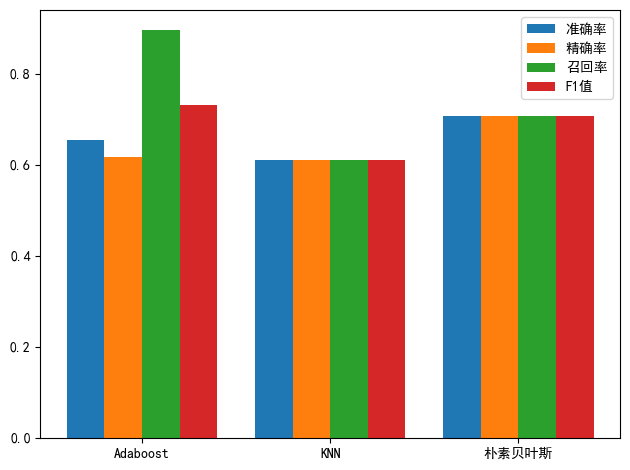

In [341]:
import matplotlib.pyplot as plt
import numpy as np

acc_list=[accuracy_wine,accuracy_wine1,accuracy_wine2]
pre_list=[precision_wine,precision_wine1,precision_wine2]
rec_list=[recall_wine,recall_wine1,recall_wine2]
f1_list=[f1_wine,f1_wine1,f1_wine2]

# 中文显示需要设置字体
plt.rcParams['font.family']=['SimHei']

labels = ['Adaboost', 'KNN', '朴素贝叶斯']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, acc_list, width, label='准确率')
rects2 = ax.bar(x - width*0.5, pre_list, width, label='精确率')
rects3 = ax.bar(x + width*0.5, rec_list, width, label='召回率')
rects4 = ax.bar(x + width*1.5, f1_list, width, label='F1值')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()


# 科比数据集

In [305]:
df=pd.read_csv("./dataset/data.csv")
temp=['shot_made_flag','shot_zone_area','shot_zone_basic','action_type',
      'combined_shot_type','shot_type','shot_zone_range','team_name','season',
      'game_id','team_id','game_date','matchup','opponent','shot_id']
data_da=df.drop(temp,axis=1)
data_da

,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
0,10,33.9723,167,72,-118.1028,10,1,0,27,18
1,12,34.0443,-157,0,-118.4268,10,1,0,22,15
2,35,33.9093,-101,135,-118.3708,7,1,0,45,16
3,43,33.8693,138,175,-118.1318,6,1,0,52,22
4,155,34.0443,0,0,-118.2698,6,2,0,19,0
...,...,...,...,...,...,...,...,...,...,...
30692,397,33.9963,1,48,-118.2688,6,4,1,5,4
30693,398,34.0443,0,0,-118.2698,6,4,1,5,0
30694,426,33.8783,-134,166,-118.4038,3,4,1,28,21
30695,448,33.7773,31,267,-118.2388,2,4,1,10,26


In [306]:
target_da=df['shot_made_flag']
target_da.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [307]:
target_da.isna().value_counts()

False    25697
True      5000
Name: shot_made_flag, dtype: int64

In [308]:
mode = target_da.mode()[0]
target_da.fillna(mode, inplace=True)
target_da

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
30692    0.0
30693    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 30697, dtype: float64

In [314]:
X_train_da,X_test_da,y_train_da,y_test_da=train_test_split(data_da,target_da,test_size=0.8,random_state=42)
X_train_da

,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
29055,48,33.9613,-27,83,-118.2968,7,1,1,21,8
25337,276,33.8733,85,171,-118.1848,10,3,0,21,19
26560,90,33.8443,-168,200,-118.4378,2,1,1,29,26
20588,353,34.0443,-2,0,-118.2718,6,3,0,50,0
5850,318,34.0443,0,0,-118.2698,4,3,0,57,0
...,...,...,...,...,...,...,...,...,...,...
29802,486,33.8913,-204,153,-118.4738,3,4,1,12,25
5390,522,33.8383,10,206,-118.2598,0,4,0,0,20
860,109,33.8903,87,154,-118.1828,10,2,0,27,17
15795,2,33.9213,-153,123,-118.4228,11,1,0,45,19


In [315]:
# 训练Adaboost分类器
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train_da, y_train_da)

# 预测测试集并计算准确率
y_pred = clf.predict(X_test_da)

# 计算准确率
accuracy_da = accuracy_score(y_test_da, y_pred)
print("Accuracy:", accuracy_da)
# 计算精确率
precision_da = precision_score(y_test_da, y_pred)
print("Precision:", precision_da)
# 计算召回率
recall_da = recall_score(y_test_da, y_pred)
print("Recall:", recall_da)
# 计算F1值
f1_da = f1_score(y_test_da, y_pred)
print("F1 Score:", f1_da)

Accuracy: 0.6382848766186171
Precision: 0.5241187384044527
Recall: 0.3089795471945751
F1 Score: 0.3887703846418496
